# 2010 Baja CA EQ: QTM Catalog Mapping



In [1]:
# IMPORT CELL

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported!")

Imported!


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 618 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [3]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [4]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.16,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356881,2010,4,4,22,41,45.87,347184,34.43929,-116.93557,-0.583,...,9807541,0.264,0.026,0,2010-04-04T22:41:45.870000Z,1.270421e+09,2010-04-04T22:41:45.869999Z,1.270421e+09,0.0,0.0
356882,2010,4,4,22,41,54.35,347185,33.16622,-115.59365,4.499,...,10531677,0.163,0.017,0,2010-04-04T22:41:54.350000Z,1.270421e+09,2010-04-04T22:41:54.350000Z,1.270421e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.33,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.29,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.62,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.67,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


In [5]:
# This entire cell was taken from the lecture notes; code was found online on github
# Needed for tick labels, since cartopy doesn't support tick labels in Lambert projections
import shapely.geometry as sgeom
from copy import copy
def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])


def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    

def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

In [6]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
FaultsIndices

[0,
 137,
 245,
 1115,
 1191,
 1275,
 1296,
 1319,
 1432,
 1524,
 1548,
 1599,
 1650,
 1887,
 1958,
 2011,
 2116,
 2122,
 2126,
 2205,
 2295,
 2618,
 2641,
 2708,
 2756,
 2841,
 2933,
 2949,
 2986,
 3714,
 3730,
 3739,
 3876,
 13125,
 13465,
 13561]

In [7]:
i = 0
minimum = FaultsIndices[i] + 1
maximum = FaultsIndices[i+1]
#ax.plot(Faults.iloc[minimum:maximum])
Temp = Faults.iloc[minimum:maximum].astype(float)
Temp.LATITUDE

len(FaultsIndices)
range(len(FaultsIndices))

for i in range(len(FaultsIndices) - 1): # need -1 because reasons
    minimum = FaultsIndices[i] + 1
    maximum = FaultsIndices[i+1]
    Temp = Faults.iloc[minimum:maximum].astype(float)
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black");

NameError: name 'ax' is not defined

## Full EQ Maps: 60 days, 30 days before, 30 days after

Wall time: 2min 3s


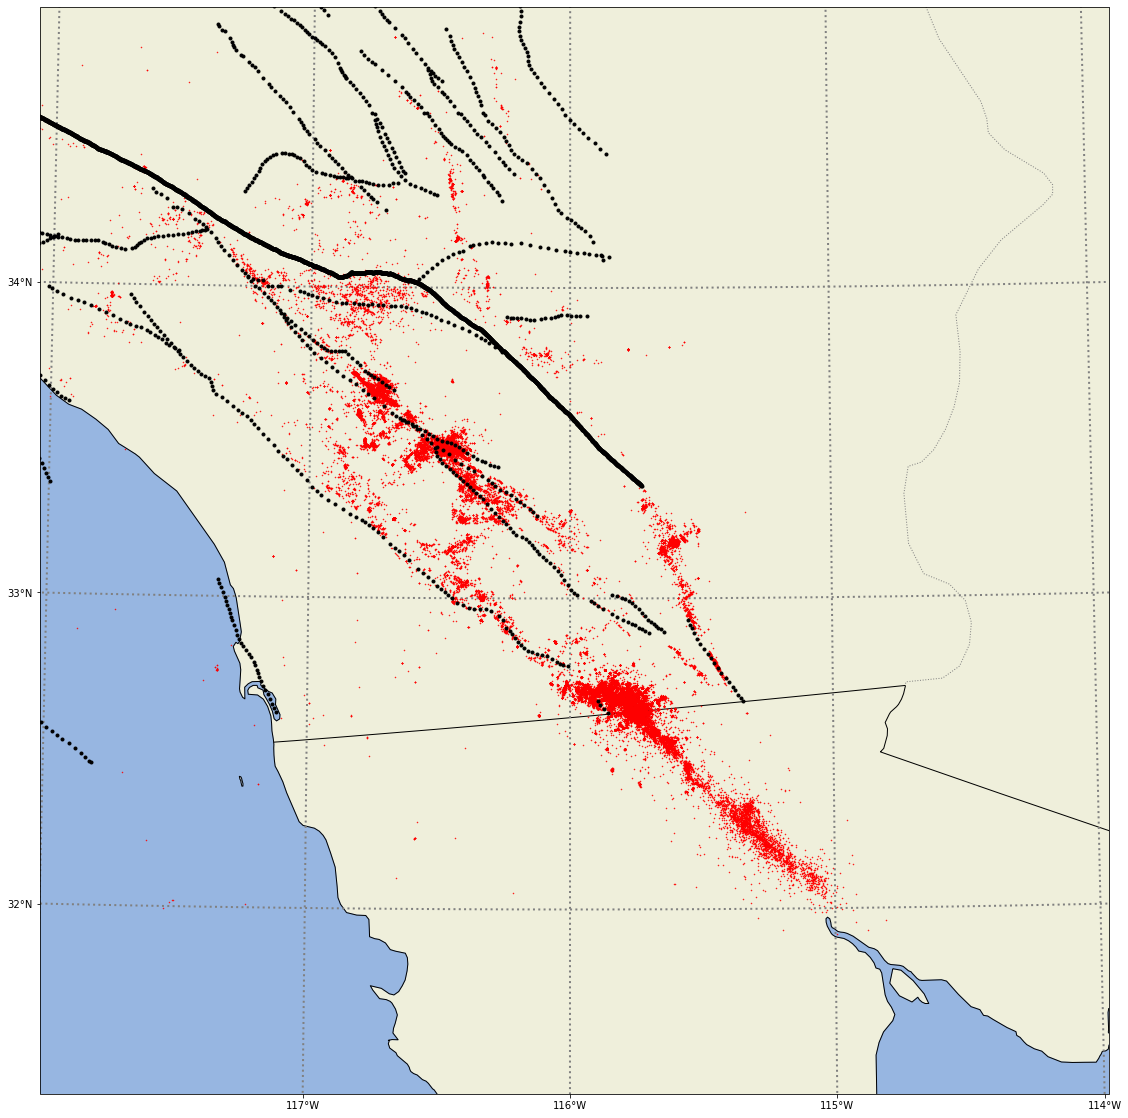

In [8]:
%%time
# Mapping: 60 days

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

# Plot data!
ax.plot(QTM_Range["LONGITUDE"].values, QTM_Range["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");

##########################
#ax.plot(Faults["LONGITUDE"].values, Faults["LATITUDE"].values,
#       transform = ccrs.Geodetic(), color = "black");
##########################

# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot

plt.savefig("Maps/EQMap_Full.png", facecolor = "white");

Wall time: 1.58 s


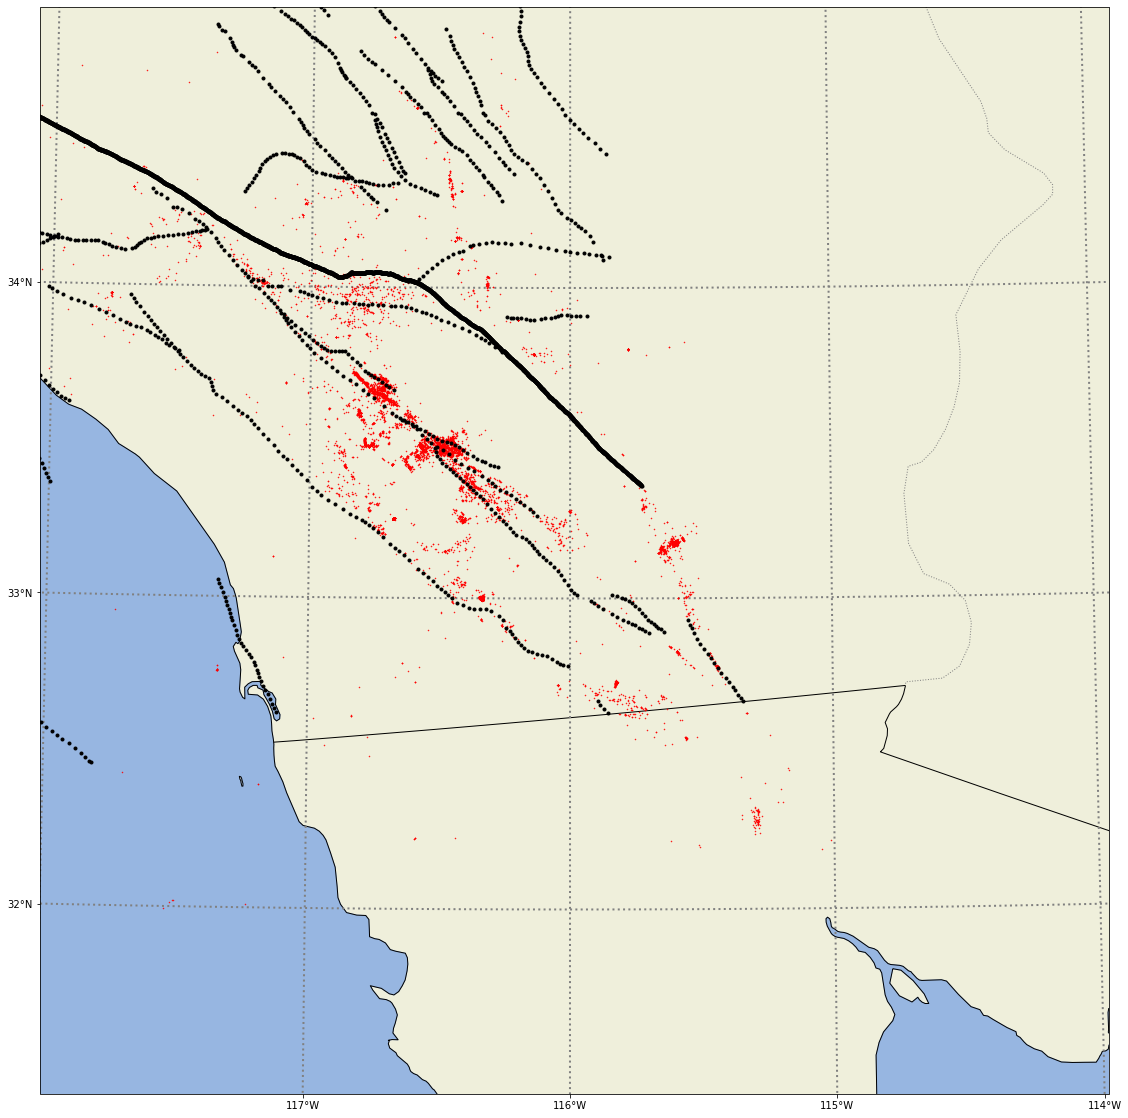

In [9]:
%%time
# Mapping: 30 days BEFORE

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

ax.plot(QTM_Range_BEFORE["LONGITUDE"].values, QTM_Range_BEFORE["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");
# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot


plt.savefig("Maps/EQMap_BEFORE.png", facecolor = "white");

Wall time: 2.53 s


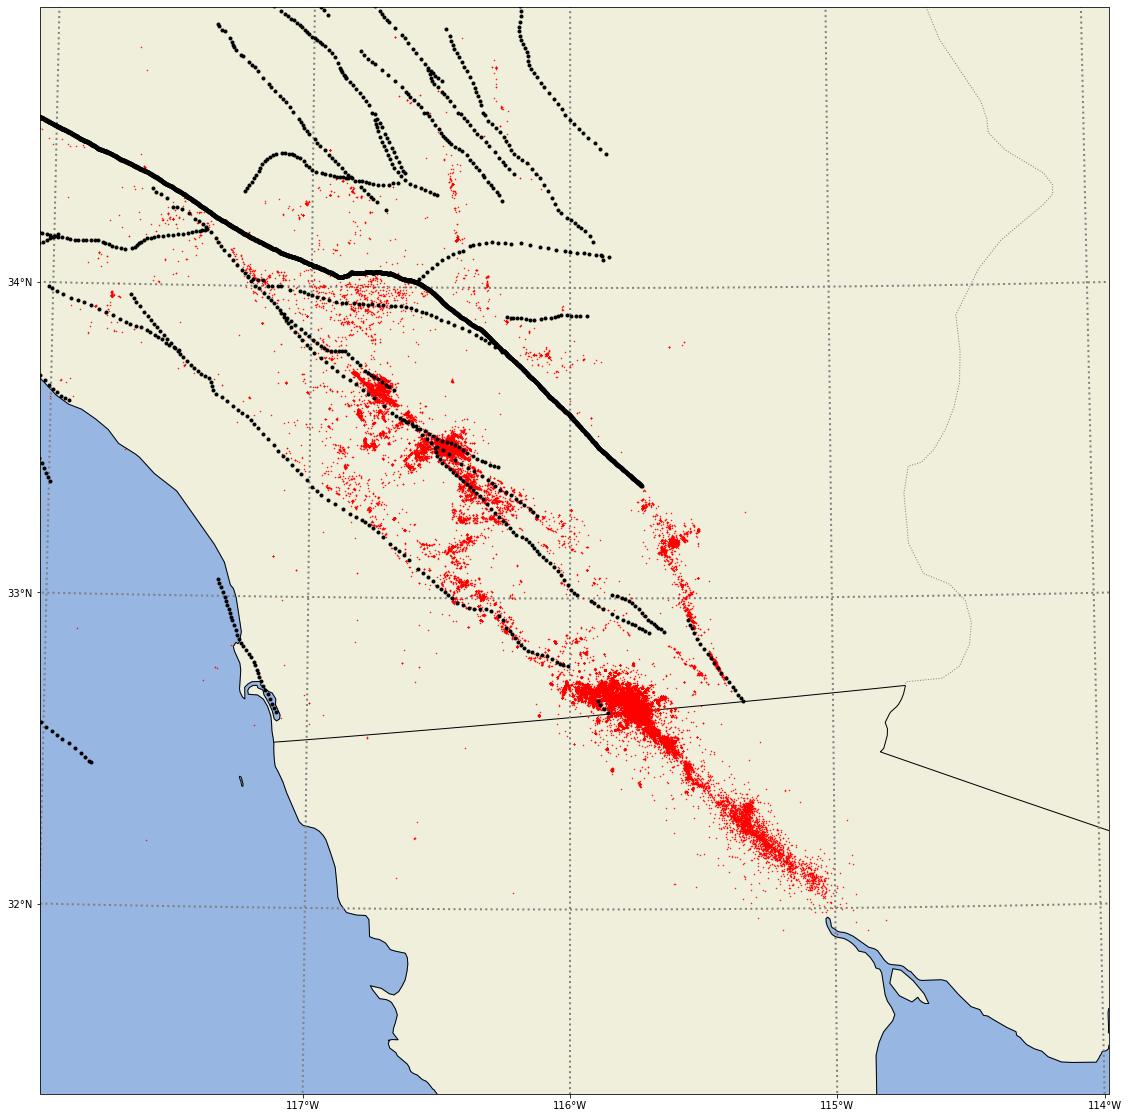

In [10]:
%%time
# Mapping: 30 days AFTER

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

ax.plot(QTM_Range_AFTER["LONGITUDE"].values, QTM_Range_AFTER["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 1, linestyle = "None");
# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot

plt.savefig("Maps/EQMap_AFTER.png", facecolor = "white");

## Full EQ Maps: Every 10, 5 days, 1 day

In [11]:
# Test cell
i = -30
Temp = QTM_Range.loc[QTM_Range["RELATIVE DAY"] >= i]
Temp = Temp.loc[Temp["RELATIVE DAY"] <= i + 5]
Temp

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344947,2010,3,11,10,32,11.030,335524,33.44088,-116.63786,5.992,...,37979992,0.278,0.023,0,2010-03-11T10:32:11.030000Z,1.268304e+09,2010-03-11T10:32:11.029999Z,1.268304e+09,-25.0,-588.0
344948,2010,3,11,10,33,6.010,335525,33.25621,-116.67504,5.767,...,14605892,0.242,0.02,0,2010-03-11T10:33:06.010000Z,1.268304e+09,2010-03-11T10:33:06.009999Z,1.268304e+09,-25.0,-588.0
344949,2010,3,11,10,37,17.633,335526,33.25627,-116.67453,6.421,...,14604284,0.721,0.019,1,2010-03-11T10:37:17.633000Z,1.268304e+09,2010-03-11T10:37:17.632999Z,1.268304e+09,-25.0,-588.0
344950,2010,3,11,10,38,5.153,335527,33.81967,-116.97704,11.680,...,37528224,0.226,0.018,1,2010-03-11T10:38:05.153000Z,1.268304e+09,2010-03-11T10:38:05.152999Z,1.268304e+09,-25.0,-588.0


In [12]:
# TEST CELL

i = 25
Temp = QTM_Range.loc[QTM_Range["RELATIVE DAY"] >= i]
Temp = Temp.loc[Temp["RELATIVE DAY"] < i + 5]
Temp2 = Temp.loc[Temp["MAGNITUDE"] == Temp["MAGNITUDE"].max()]
Temp2
#348360

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
467366,2010,4,29,17,51,15.775,14686028,32.62016,-115.76791,6.55,...,14686028,1.0,0.01,1,2010-04-29T17:51:15.775000Z,1.272563e+09,2010-04-29T17:51:15.775000Z,1.272563e+09,25.0,595.0


In [13]:
# Mapping: largest M EQs out of every 5 days

QTM_Range_5 = pd.DataFrame()
Days = np.arange(-30, 30, step = 5) # step = 5 days; goes up to 29, don't need 30
for i in Days:
    Temp = QTM_Range.loc[QTM_Range["RELATIVE DAY"] >= i]
    Temp = Temp.loc[Temp["RELATIVE DAY"] < i + 5] # Check inclusion/exclusion!
    Temp2 = Temp.loc[Temp["MAGNITUDE"] == Temp["MAGNITUDE"].max()]
    Temp2 = Temp2.iloc[-1]
    QTM_Range_5 = QTM_Range_5.append(Temp2)
    #print(i)
QTM_Range_5

,DAY,DEPTH,EVENTID,HOUR,LATITUDE,LONGITUDE,MAD,MAGNITUDE,MAGP5,MAGP95,...,RELATIVE DAY,RELATIVE HOUR,RELOCATED?,SECOND,STACKCC,TEMPLATEID,TIMESTAMP,VECTORIZATION,VTIMESTAMP,YEAR
342675,9.0,6.005,14598228.0,4.0,32.99895,-116.33825,0.01,4.02,4.02,4.02,...,-27.0,-642.0,1.0,21.534,1.0,14598228.0,1.268108e+09,2010-03-09T04:18:21.533999Z,1.268108e+09,2010.0
346654,13.0,2.642,14600292.0,16.0,32.99978,-116.34234,0.01,4.23,4.23,4.23,...,-22.0,-534.0,0.0,31.980,1.0,14600292.0,1.268498e+09,2010-03-13T16:32:31.980000Z,1.268498e+09,2010.0
348838,16.0,18.392,14601172.0,11.0,33.98083,-118.09737,0.01,4.44,4.44,4.44,...,-19.0,-468.0,1.0,59.698,1.0,14601172.0,1.268737e+09,2010-03-16T11:03:59.698000Z,1.268737e+09,2010.0
350829,21.0,8.240,10145122.0,6.0,32.27033,-115.29800,0.01,3.91,3.91,3.91,...,-15.0,-352.0,0.0,35.460,1.0,10145122.0,1.269152e+09,2010-03-21T06:12:35.460000Z,1.269152e+09,2010.0
352873,25.0,5.520,14604780.0,22.0,35.93342,-120.51311,0.01,3.60,3.60,3.60,...,-10.0,-240.0,0.0,49.760,1.0,14604780.0,1.269557e+09,2010-03-25T22:44:49.759999Z,1.269557e+09,2010.0
356399,3.0,6.680,14607220.0,23.0,32.28830,-115.28310,0.01,4.34,4.34,4.34,...,-1.0,-24.0,0.0,47.480,1.0,14607220.0,1.270336e+09,2010-04-03T23:03:47.479999Z,1.270336e+09,2010.0
356880,4.0,13.990,14607652.0,22.0,32.27350,-115.29400,0.01,7.20,7.20,7.20,...,0.0,0.0,0.0,42.160,1.0,14607652.0,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,2010.0
382885,9.0,5.750,10595133.0,23.0,32.23370,-115.25870,0.01,4.70,4.70,4.70,...,5.0,120.0,0.0,42.170,1.0,10595133.0,1.270854e+09,2010-04-09T23:05:42.170000Z,1.270854e+09,2010.0
412682,15.0,12.720,10612285.0,10.0,32.16283,-115.05400,0.01,4.73,4.73,4.73,...,10.0,252.0,0.0,47.990,1.0,10612285.0,1.271327e+09,2010-04-15T10:20:47.990000Z,1.271327e+09,2010.0
444482,22.0,6.592,10629477.0,17.0,32.66530,-115.79335,0.01,4.63,4.63,4.63,...,18.0,427.0,1.0,12.698,1.0,10629477.0,1.271956e+09,2010-04-22T17:12:12.698000Z,1.271956e+09,2010.0


Wall time: 1.4 s


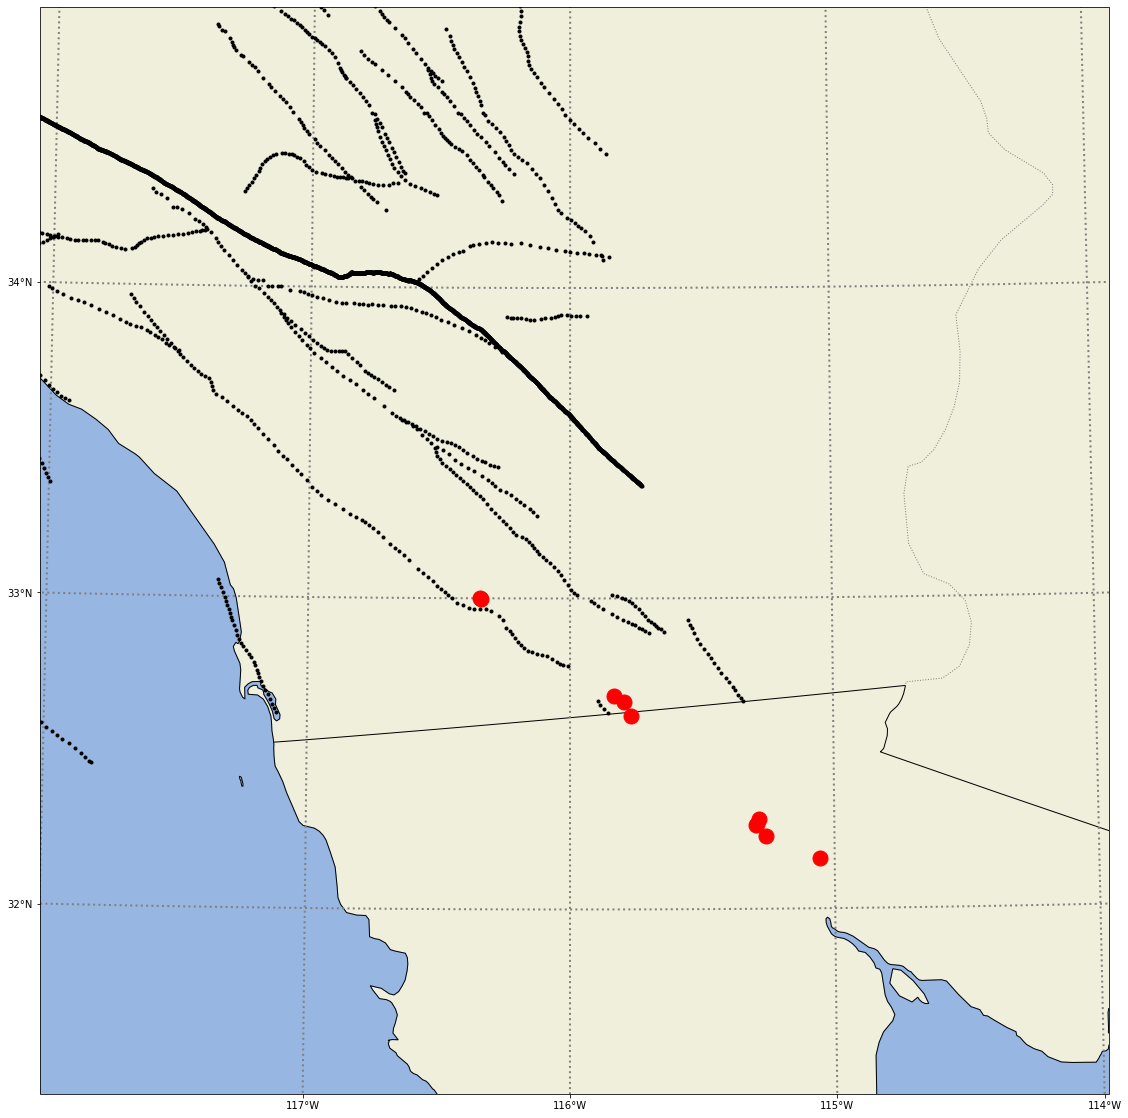

In [14]:
%%time
# Mapping: largest M EQs out of every 5 days

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

# Plot data!
ax.plot(QTM_Range_5["LONGITUDE"].values, QTM_Range_5["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 30, linestyle = "None");

##########################
#ax.plot(Faults["LONGITUDE"].values, Faults["LATITUDE"].values,
#       transform = ccrs.Geodetic(), color = "black");
##########################

# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot

plt.savefig("Maps/EQMap_Full_5.png", facecolor = "white");

In [15]:
%%time
# Mapping: largest M EQs out of every 10 days

QTM_Range_10 = pd.DataFrame()
Days = np.arange(-30, 30, step = 10) # step = 5 days; goes up to 29, don't need 30
for i in Days:
    Temp = QTM_Range.loc[QTM_Range["RELATIVE DAY"] >= i]
    Temp = Temp.loc[Temp["RELATIVE DAY"] < i + 10] # Inclusion fixed 2/8
    Temp2 = Temp.loc[Temp["MAGNITUDE"] == Temp["MAGNITUDE"].max()]
    Temp2 = Temp2.iloc[-1]
    QTM_Range_10 = QTM_Range_10.append(Temp2)
    #print(i)
QTM_Range_10

Wall time: 227 ms


,DAY,DEPTH,EVENTID,HOUR,LATITUDE,LONGITUDE,MAD,MAGNITUDE,MAGP5,MAGP95,...,RELATIVE DAY,RELATIVE HOUR,RELOCATED?,SECOND,STACKCC,TEMPLATEID,TIMESTAMP,VECTORIZATION,VTIMESTAMP,YEAR
346654,13.0,2.642,14600292.0,16.0,32.99978,-116.34234,0.01,4.23,4.23,4.23,...,-22.0,-534.0,0.0,31.980,1.0,14600292.0,1.268498e+09,2010-03-13T16:32:31.980000Z,1.268498e+09,2010.0
348838,16.0,18.392,14601172.0,11.0,33.98083,-118.09737,0.01,4.44,4.44,4.44,...,-19.0,-468.0,1.0,59.698,1.0,14601172.0,1.268737e+09,2010-03-16T11:03:59.698000Z,1.268737e+09,2010.0
356399,3.0,6.680,14607220.0,23.0,32.28830,-115.28310,0.01,4.34,4.34,4.34,...,-1.0,-24.0,0.0,47.480,1.0,14607220.0,1.270336e+09,2010-04-03T23:03:47.479999Z,1.270336e+09,2010.0
356880,4.0,13.990,14607652.0,22.0,32.27350,-115.29400,0.01,7.20,7.20,7.20,...,0.0,0.0,0.0,42.160,1.0,14607652.0,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,2010.0
412682,15.0,12.720,10612285.0,10.0,32.16283,-115.05400,0.01,4.73,4.73,4.73,...,10.0,252.0,0.0,47.990,1.0,10612285.0,1.271327e+09,2010-04-15T10:20:47.990000Z,1.271327e+09,2010.0
461436,27.0,4.439,14682004.0,10.0,32.68712,-115.83374,0.01,4.83,4.83,4.83,...,23.0,540.0,1.0,35.457,1.0,14682004.0,1.272366e+09,2010-04-27T10:55:35.457000Z,1.272366e+09,2010.0


Wall time: 1.49 s


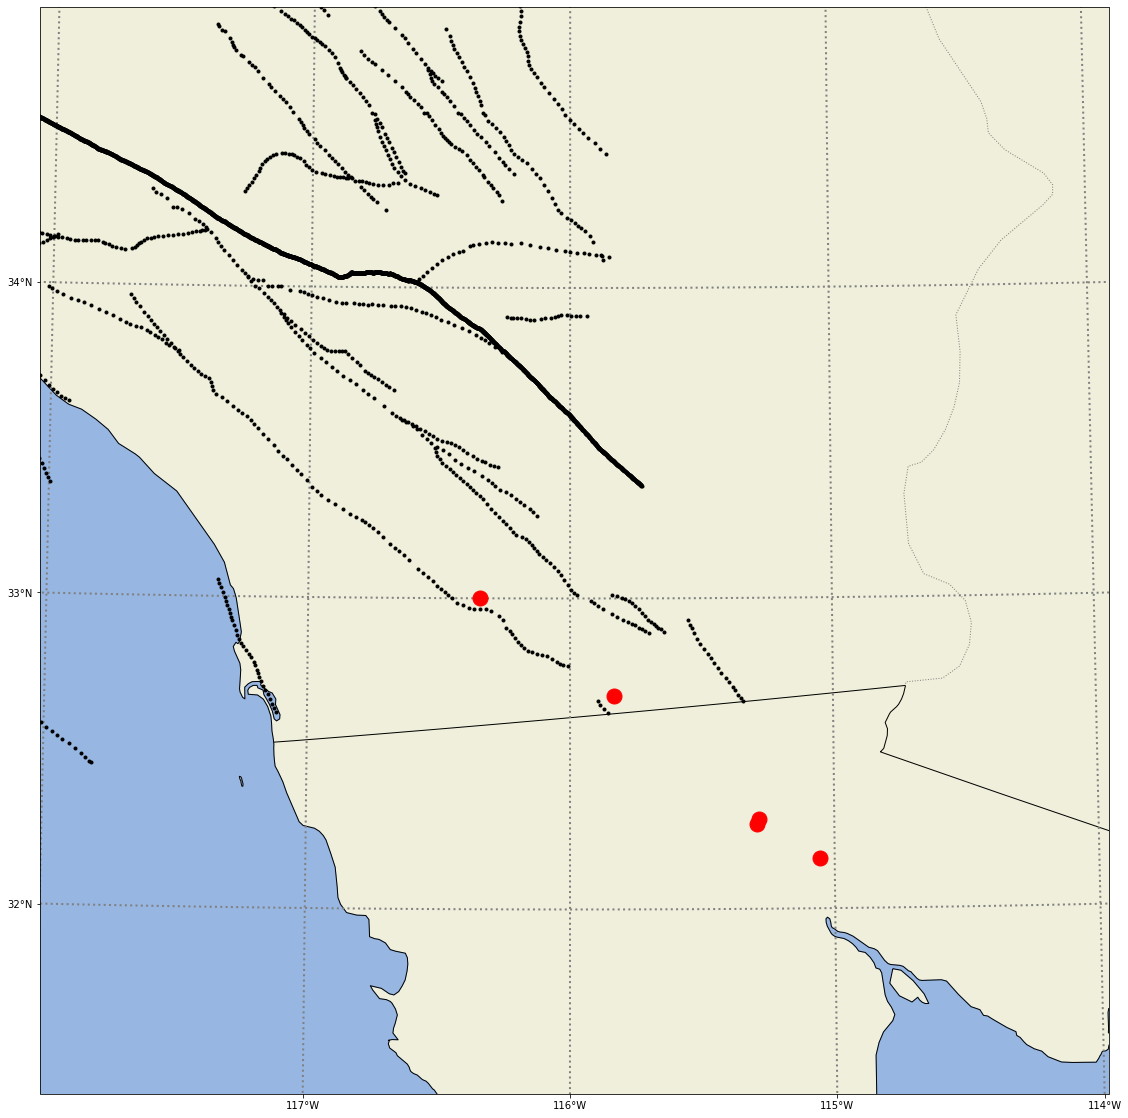

In [16]:
%%time
# Mapping: largest M EQs out of every 10 days

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

# Plot data!
ax.plot(QTM_Range_10["LONGITUDE"].values, QTM_Range_10["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 30, linestyle = "None");

##########################
#ax.plot(Faults["LONGITUDE"].values, Faults["LATITUDE"].values,
#       transform = ccrs.Geodetic(), color = "black");
##########################

# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot

plt.savefig("Maps/EQMap_Full_10.png", facecolor = "white");

In [17]:
%%time
# Mapping: largest M EQs out of every day

QTM_Range_1 = pd.DataFrame()
Days = np.arange(-30, 30, step = 1) # step = 5 days; goes up to 29, don't need 30
for i in Days:
    Temp = QTM_Range.loc[QTM_Range["RELATIVE DAY"] >= i]
    Temp = Temp.loc[Temp["RELATIVE DAY"] < i + 1] # Inclusion fixed 2/8
    Temp2 = Temp.loc[Temp["MAGNITUDE"] == Temp["MAGNITUDE"].max()]
    Temp2 = Temp2.iloc[-1]
    QTM_Range_1 = QTM_Range_1.append(Temp2)
    #print(i)
QTM_Range_1

Wall time: 2.08 s


,DAY,DEPTH,EVENTID,HOUR,LATITUDE,LONGITUDE,MAD,MAGNITUDE,MAGP5,MAGP95,...,RELATIVE DAY,RELATIVE HOUR,RELOCATED?,SECOND,STACKCC,TEMPLATEID,TIMESTAMP,VECTORIZATION,VTIMESTAMP,YEAR
341664,6.0,10.357,14597404.0,7.0,34.29126,-116.45543,0.01,2.24,2.24,2.24,...,-30.0,-712.0,1.0,27.718,1.0,14597404.0,1.267859e+09,2010-03-06T07:00:27.718000Z,1.267859e+09,2010.0
341921,7.0,-0.240,14597596.0,6.0,36.78067,-121.56900,0.01,3.60,3.60,3.60,...,-29.0,-688.0,0.0,11.220,1.0,14597596.0,1.267942e+09,2010-03-07T06:14:11.220000Z,1.267942e+09,2010.0
342269,8.0,11.010,14597804.0,3.0,36.06325,-117.87602,0.01,3.28,3.28,3.28,...,-28.0,-667.0,1.0,20.642,1.0,14597804.0,1.268020e+09,2010-03-08T03:43:20.641999Z,1.268020e+09,2010.0
342675,9.0,6.005,14598228.0,4.0,32.99895,-116.33825,0.01,4.02,4.02,4.02,...,-27.0,-642.0,1.0,21.534,1.0,14598228.0,1.268108e+09,2010-03-09T04:18:21.533999Z,1.268108e+09,2010.0
343438,9.0,11.055,14598516.0,20.0,36.06263,-117.87553,0.01,3.66,3.66,3.66,...,-26.0,-627.0,1.0,12.725,1.0,14598516.0,1.268165e+09,2010-03-09T20:05:12.724999Z,1.268165e+09,2010.0
344448,11.0,6.618,14598996.0,1.0,33.25470,-116.67635,0.01,3.52,3.52,3.52,...,-25.0,-597.0,1.0,38.705,1.0,14598996.0,1.268272e+09,2010-03-11T01:39:38.704999Z,1.268272e+09,2010.0
345255,11.0,7.336,14599396.0,21.0,32.71234,-116.03981,0.01,3.39,3.39,3.39,...,-24.0,-578.0,0.0,25.740,1.0,14599396.0,1.268342e+09,2010-03-11T21:09:25.739999Z,1.268342e+09,2010.0
345740,12.0,2.786,14599716.0,13.0,35.97097,-117.66328,0.01,2.68,2.68,2.68,...,-23.0,-561.0,1.0,4.852,1.0,14599716.0,1.268400e+09,2010-03-12T13:24:04.852000Z,1.268400e+09,2010.0
346654,13.0,2.642,14600292.0,16.0,32.99978,-116.34234,0.01,4.23,4.23,4.23,...,-22.0,-534.0,0.0,31.980,1.0,14600292.0,1.268498e+09,2010-03-13T16:32:31.980000Z,1.268498e+09,2010.0
348346,15.0,7.390,14600916.0,10.0,32.28880,-115.35000,0.01,2.18,2.18,2.18,...,-21.0,-493.0,0.0,46.380,1.0,14600916.0,1.268648e+09,2010-03-15T10:08:46.380000Z,1.268648e+09,2010.0


Wall time: 1.33 s


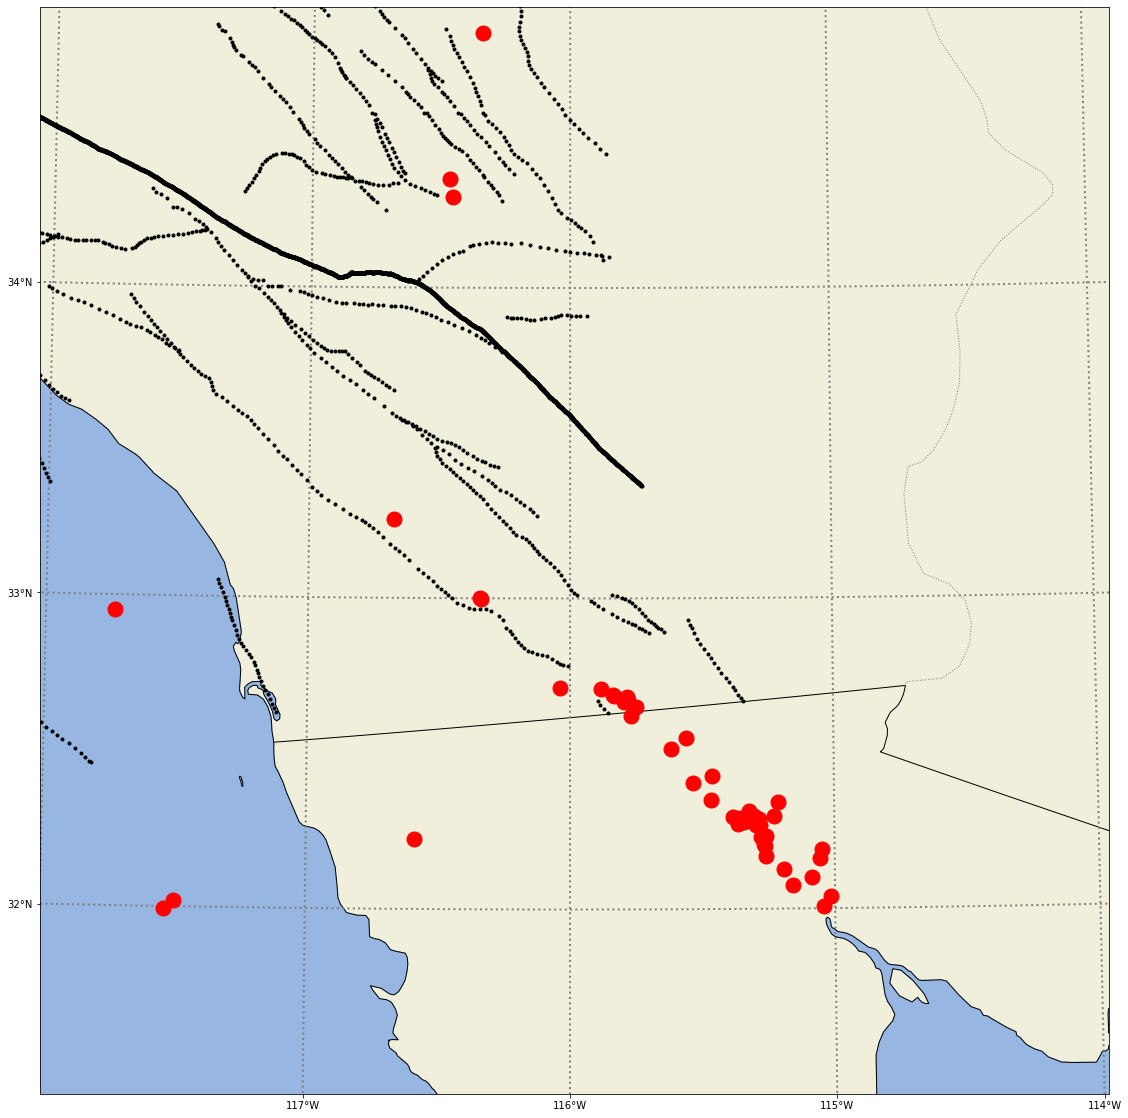

In [18]:
%%time
# Mapping: largest M EQs out of every day

proj = ccrs.LambertConformal(central_longitude = MeanLon, central_latitude = MeanLat)
fig = plt.figure(figsize = (20,20), frameon = True)
ax = plt.axes(projection = proj)
ax.set_extent([MeanLon - 2, MeanLon + 2, MeanLat - 1.5, MeanLat + 2], crs = ccrs.PlateCarree())
ax.add_feature(LAND);
ax.add_feature(OCEAN);
ax.coastlines(); # Put this line AFTER add_feature()s 
ax.add_feature(BORDERS,linestyle="-",linewidth=1); # Country border

states_provinces = cfeature.NaturalEarthFeature(category = "cultural", name = "admin_1_states_provinces_lines",
        scale = "50m", edgecolor = "grey", facecolor = "none", linestyle = "dotted")
ax.add_feature(states_provinces);

# ***GRIDLINES AND LABELS BLOCK***
gl=ax.gridlines(ylocs = np.arange(0, 90, 1), xlocs = np.arange(-180, 180, 1), 
                linewidth = 2, linestyle = "dotted", color = "grey")
# Added latitude, longitude grid lines
fig.canvas.draw()
xticks=list(range(-180, 180, 1))
yticks=list(range(0, 90, 1))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)
# ***GRIDLINES AND LABELS BLOCK***

# Plot data!
ax.plot(QTM_Range_1["LONGITUDE"].values, QTM_Range_1["LATITUDE"].values, 
        transform = ccrs.Geodetic(), marker = ".", color = "red", 
        markersize = 30, linestyle = "None");

##########################
#ax.plot(Faults["LONGITUDE"].values, Faults["LATITUDE"].values,
#       transform = ccrs.Geodetic(), color = "black");
##########################

# Plot fault traces! For loop through each fault

for i in range(len(FaultsIndices) - 1): # need -1 because reasons; stepping through indices of fault indices
    minimum = FaultsIndices[i] + 1 # minimum is row after first index; inclusive at beginning
    maximum = FaultsIndices[i+1] # maximum is row before last index; iloc is exclusive at end
    Temp = Faults.iloc[minimum:maximum].astype(float) # convert data from objects to floats
    ax.plot(Temp.LONGITUDE.values, Temp.LATITUDE.values, 
           transform = ccrs.Geodetic(), color = "black", 
            marker = ".", linestyle = "None");
    # plot each datapoint as a black dot

plt.savefig("Maps/EQMap_Full_1.png", facecolor = "white");